In [1]:
import tweepy
import wordcloud
from textblob import TextBlob
import re
import spacy


In [2]:
api_key = "btZzNAPzYRVauFxGZp0ylCiWq"
api_secret = "uAatv7uLAqG1nkgad180vtaw1P2aTp4hH7QOrsDtZa3R2d97Cv"
access_token = "857530568-NtMnTwJbeAUsBJ75akfvUlFyU8WSEvoXxxZOeJqy"
access_token_secret = "TBV1OofYaYVBR20T7lLUQplVqzbkVFOgmRGlF2OG9nn3e"

In [3]:
auth = tweepy.OAuthHandler(api_key,api_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [31]:
tweets = api.search(q="Reliance jio",count=50,tweet_mode="extended")

In [37]:
sents = []
clean_tweets = []

for tw in tweets:
    tw = tw.full_text
    tw = re.sub("@[a-zA-Z0-9:_]+","",tw) # remove handles
    tw = re.sub("#","",tw) # remove #
    tw = re.sub("RT","",tw)
    tw = re.sub("http[a-zA-Z0-9._\/:\%]+","",tw) # to remove urls
    tw = tw.strip() # to remove whitespace from end and begining of text
    print(tw)
    if len(tw)>10:
        
        tw = TextBlob(tw)
        if tw.detect_language()!='en':
            tw = tw.translate(to='en')
            print(tw.raw)
        clean_tweets.append(tw.raw)
        if tw.sentiment.polarity>+0.1:
            print("Positive")
            sents.append("Positive")
        elif tw.sentiment.polarity<-0.1:
            print("Negative")
            sents.append("Negative")
        else:
            print("Neutral")
            sents.append("Neutral")
        print("****************************")
        print("\n")

Anant Ambani takes seat on boards of RIL’s 2 new solar cos

anantambani reliance jio mukeshambani switchbazaar elec…
Positive
****************************


Anant Ambani takes seat on boards of RIL’s 2 new solar cos

anantambani reliance jio mukeshambani switchbazaar elec…
Positive
****************************


It is one of the largest telecom project service providers for Reliance Jio and is currently engaged in rolling out of 4G OFC Network services across Northern India.
Neutral
****************************


Anant Ambani takes seat on boards of RIL’s 2 new solar cos

anantambani reliance jio mukeshambani switchbazaar elec…
Positive
****************************


Anant Ambani takes seat on boards of RIL’s 2 new solar cos

anantambani reliance jio mukeshambani switchbazaar electrical b2b marketplace startup thinkbusiness thinkswitchbazaar switch2switchbazaar cleanenergy greenenergy renewableenergy
Positive
****************************


Reliance Jio Users Data Loan Free - How to ava

Sh.  Chairman/CEC  inaugurates 4G Mobile Tower in one of the remotest village Fotoksar in Leh under…
Neutral
****************************


jio Reliance भारत की नंबर वन कंपनी होने के बाद भी इतना घटिया काम कर रही है लोगों का डाटा चुरा रही है कुछ तो शर्म करो जिओ…
jio Reliance is doing such a poor job even after being the number one company of India, stealing people's data, do some shame jio…
Negative
****************************


Sh.  Chairman/CEC  inaugurates 4G Mobile Tower in one of the remotest village Fotoksar in Leh under…
Neutral
****************************


Hi  

Tower of Reliance Jio Not working at our Location. 
No 1 Comes to our Village to Fix the Problem.

Please do the Needful. As this Problem affected our Online Classes &amp; Work from HOME. 

Required urgent Action on It.
Neutral
****************************


Sh.  Chairman/CEC  inaugurates 4G Mobile Tower in one of the remotest village Fotoksar in Leh under…
Neutral
****************************




In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


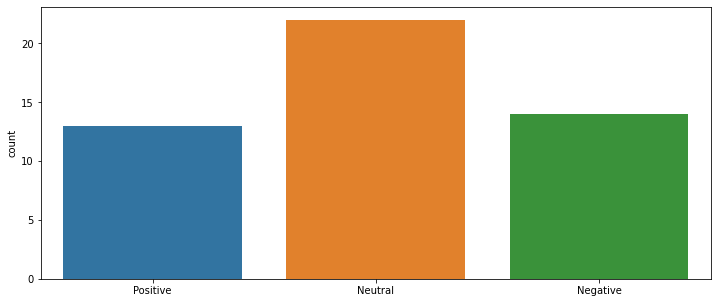

In [35]:
plt.figure(figsize=(12,5))
sns.countplot(sents)
plt.show()

### Wordcloud analysis

In [38]:
df = pd.DataFrame({"tweets":clean_tweets,"sents":sents})
df.head()

,tweets,sents
0,Anant Ambani takes seat on boards of RIL’s 2 n...,Positive
1,Anant Ambani takes seat on boards of RIL’s 2 n...,Positive
2,It is one of the largest telecom project servi...,Neutral
3,Anant Ambani takes seat on boards of RIL’s 2 n...,Positive
4,Anant Ambani takes seat on boards of RIL’s 2 n...,Positive


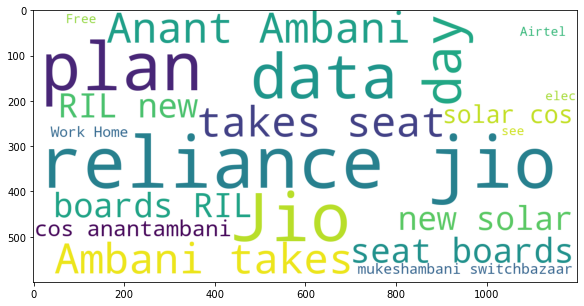

In [39]:
ptweets = df.tweets[df.sents=="Positive"].tolist()

wd = wordcloud.WordCloud(background_color='white',max_words=20,width=1200,height=600).generate_from_text(" ".join(ptweets))
plt.figure(figsize=(12,5))
plt.imshow(wd)
plt.show()

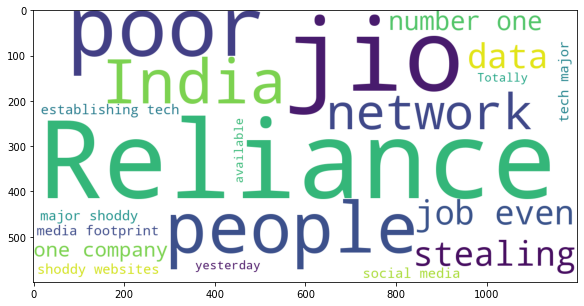

In [40]:
ntweets = df.tweets[df.sents=="Negative"].tolist()

wd = wordcloud.WordCloud(background_color='white',max_words=20,width=1200,height=600).generate_from_text(" ".join(ntweets))
plt.figure(figsize=(12,5))
plt.imshow(wd)
plt.show()

### NER ANalysis

In [47]:
for tw in ptweets:
    doc = nlp(tw)
    displacy.render(doc,style='ent',jupyter=True)

In [48]:
for tw in ntweets:
    doc = nlp(tw)
    displacy.render(doc,style='ent',jupyter=True)

C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


# text analytics with textblob

In [19]:
data = TextBlob("Hello Everyone, Hope you are enjoying Machine Learning.")

In [20]:
data.detect_language()

'en'

In [21]:
data.translate(to='hi')

TextBlob("सभी को नमस्कार, आशा है कि आप मशीन लर्निंग का आनंद ले रहे होंगे।")

In [22]:
data.translate(to='mr')

TextBlob("प्रत्येकास अभिवादन, आशा आहे की आपण मशीन लर्निंगचा आनंद घेत असाल.")

In [23]:
data.translate(to='te')

TextBlob("అందరికీ హలో, మీరు యంత్ర అభ్యాసాన్ని ఆనందిస్తున్నారని ఆశిస్తున్నాను.")

In [24]:
data.translate(to='ka')

TextBlob("ყველას მოგესალმებით, იმედია გსიამოვნებთ მანქანური სწავლება.")

In [25]:
data.translate(to='bn')

TextBlob("সবাইকে হ্যালো, আশা করি আপনি মেশিন লার্নিং উপভোগ করছেন।")

In [26]:
data.translate(to='ta')

TextBlob("அனைவருக்கும் வணக்கம், நீங்கள் இயந்திர கற்றலை அனுபவிக்கிறீர்கள் என்று நம்புகிறேன்.")

In [27]:
data = TextBlob("the movie was amazing and i love it")
data.sentiment.polarity

0.55

In [28]:
data = TextBlob("the movie was bad and i hate it")
data.sentiment.polarity

-0.75

## NER - Named Entity Recognition

In [41]:
import spacy
from spacy import displacy

In [45]:
nlp = spacy.load('en')
doc = nlp("John purchased a watch in Mumbai while working with State Bank of India and gifted to Cherry Kriston last monday.")


In [46]:
displacy.render(doc,style='ent',jupyter=True)